In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
insurance_data = pd.read_csv("/content/drive/MyDrive/insurance.csv")

In [ ]:
insurance_data.sample(10)

,age,sex,bmi,children,smoker,region,charges
981,34,male,21.375,0,no,northeast,4500.33925
239,44,male,38.060,1,no,southeast,7152.67140
472,19,female,29.800,0,no,southwest,1744.46500
156,48,male,24.420,0,yes,southeast,21223.67580
1268,20,female,33.300,0,no,southwest,1880.48700
521,32,female,44.220,0,no,southeast,3994.17780
1149,42,male,34.100,0,no,southwest,5979.73100
328,64,female,33.800,1,yes,southwest,47928.03000
570,31,female,29.100,0,no,southwest,3761.29200
917,45,male,22.895,0,yes,northeast,35069.37452


<ipython-input-58-e562d0b6178f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(insurance_data.corr())


<Axes: >

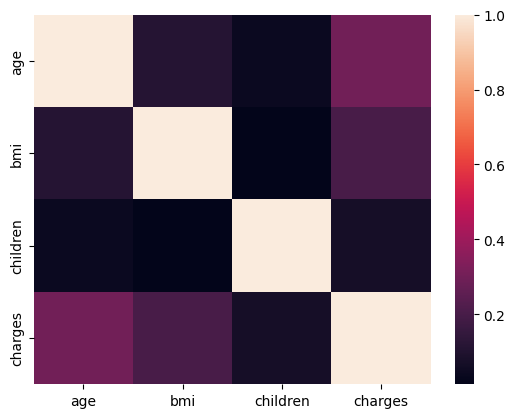

In [ ]:
sns.heatmap(insurance_data.corr())


In [ ]:
insurance_data.info() # Veri hakkında bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Benzersiz değerleri görüntüle
print(insurance_data['sex'].unique())
print(insurance_data['smoker'].unique())
print(insurance_data['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


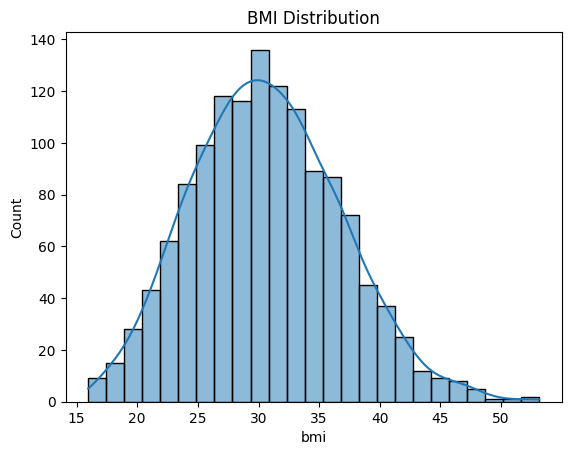

In [ ]:
# BMI dağılımını görselleştir
sns.histplot(data=insurance_data, x="bmi", kde=True)
plt.title("BMI Distribution")
plt.show()

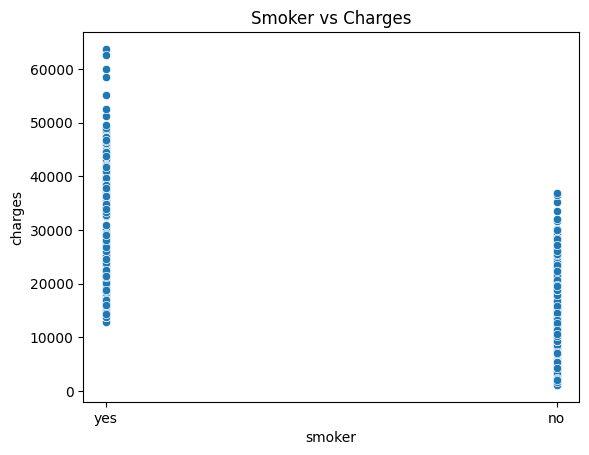

In [ ]:
sns.scatterplot(data=insurance_data, x="smoker", y="charges")
plt.title("Smoker vs Charges")
plt.show()

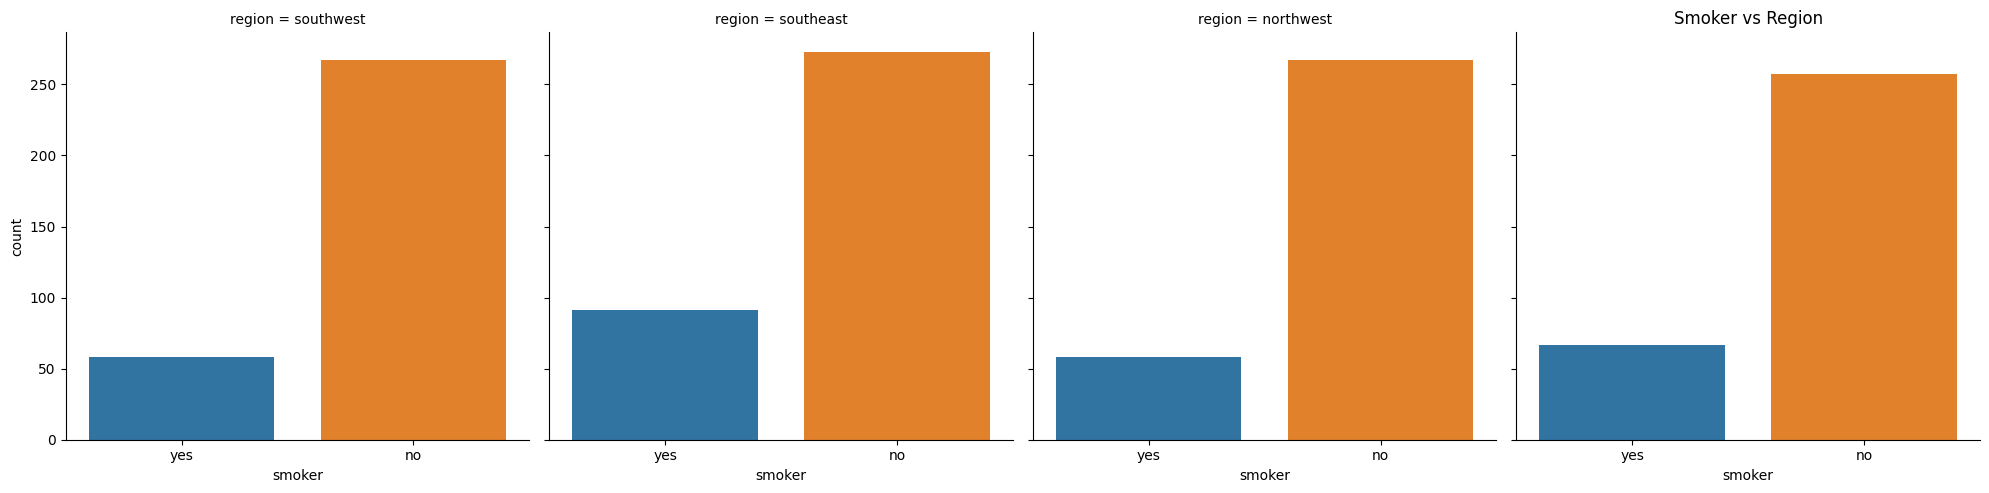

In [ ]:
sns.catplot(data=insurance_data, x="smoker", col="region", kind="count")
plt.title("Smoker vs Region")
plt.show()

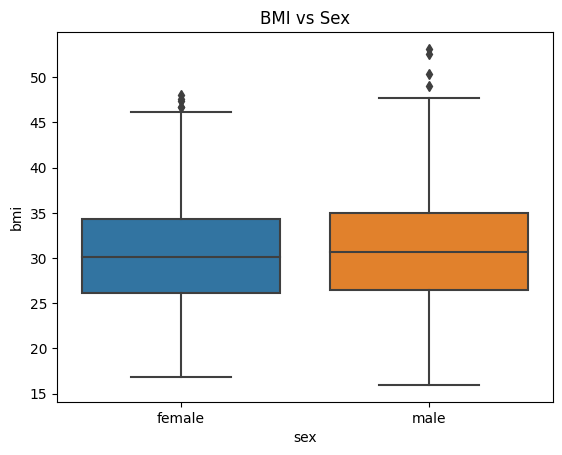

In [ ]:
sns.boxplot(data=insurance_data, x="sex", y="bmi")
plt.title("BMI vs Sex")
plt.show()

In [ ]:
# En çok çocuğa sahip olan bölgeyi bul
region_with_most_children = insurance_data.groupby("region")["children"].sum().idxmax()

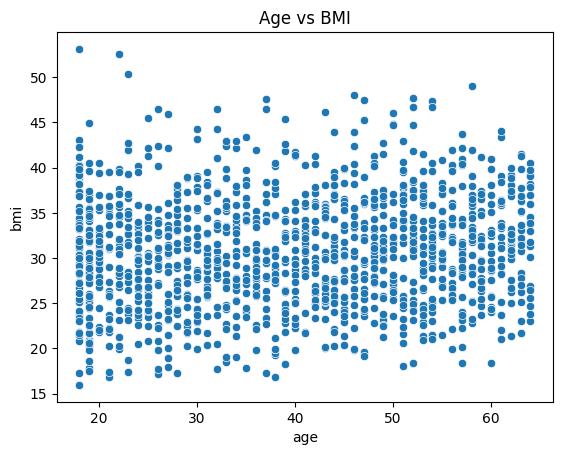

In [ ]:
# Yaşa göre BMI dağılımını görselleştir
sns.scatterplot(data=insurance_data, x="age", y="bmi")
plt.title("Age vs BMI")
plt.show()

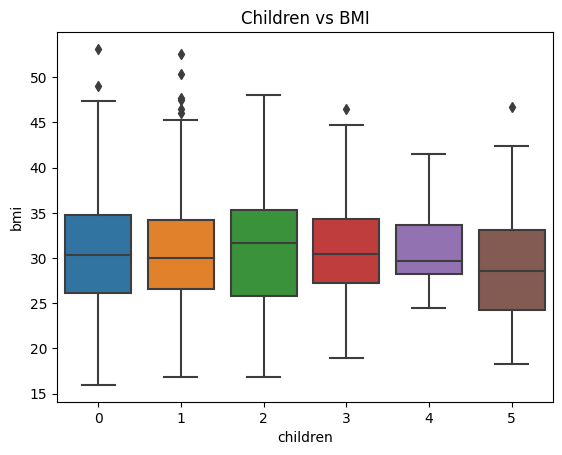

In [ ]:
# Çocuk sayısına göre BMI dağılımını görselleştir
sns.boxplot(data=insurance_data, x="children", y="bmi")
plt.title("Children vs BMI")
plt.show()

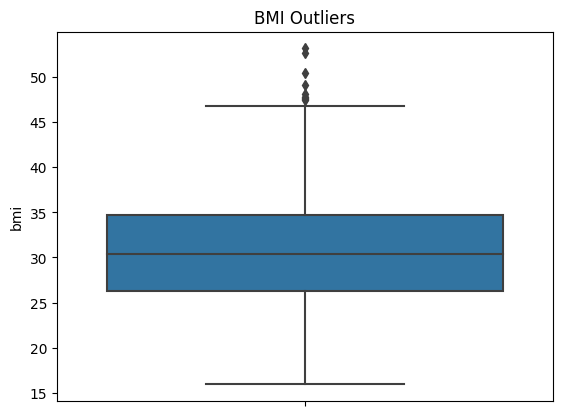

In [ ]:
# BMI değerlerindeki aykırı değerleri görselleştir
sns.boxplot(data=insurance_data, y="bmi")
plt.title("BMI Outliers")
plt.show()

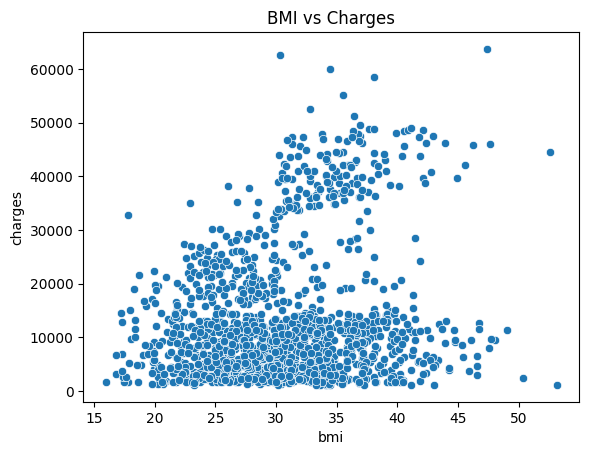

In [ ]:
# BMI ile ücretler arasındaki ilişkiyi görselleştir
sns.scatterplot(data=insurance_data, x="bmi", y="charges")
plt.title("BMI vs Charges")
plt.show()

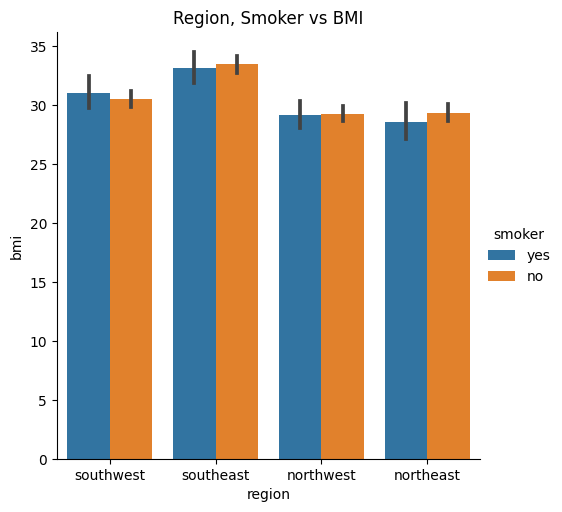

In [ ]:
# Bölgelere göre sigara içenlerin BMI'ını görselleştir
sns.catplot(data=insurance_data, x="region", hue="smoker", y="bmi", kind="bar")
plt.title("Region, Smoker vs BMI")
plt.show()

In [ ]:
#insurance_data['age_sex'] = insurance_data['age'] * insurance_data['sex']

[]

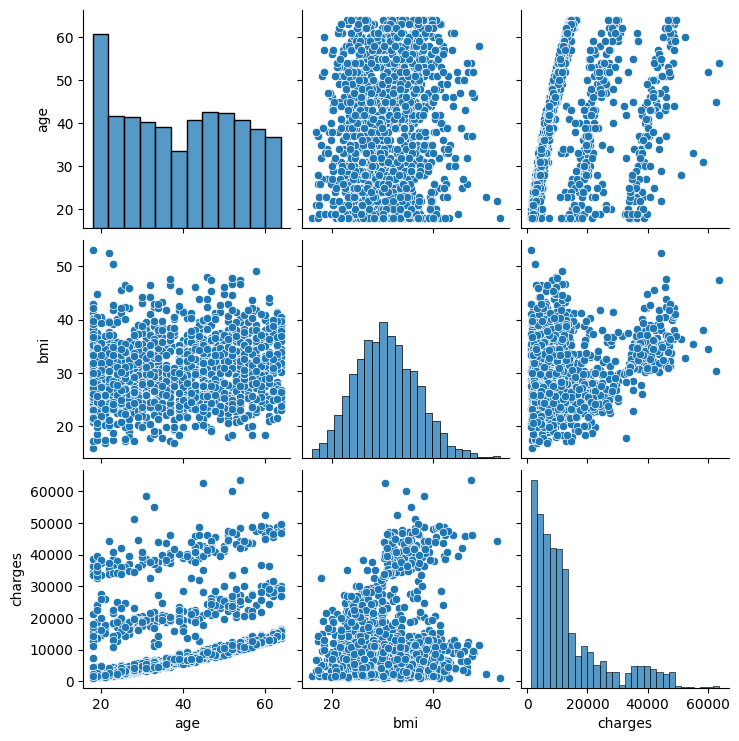

In [ ]:
 #mevcut özelliklerle ilişkileri görselleştir
sns.pairplot(insurance_data[['age', 'bmi', 'charges','sex']])
plt.plot()

In [ ]:
# Veriyi sayısal değerlere dönüştür
insurance_data = insurance_data.replace({
    'sex': {
        'female': 0,
        'male': 1,
    },
    'smoker': {
        'no': 0,
        'yes': 1,
    },
    'region': {
        'southwest': 0,
        'southeast': 1,
        'northwest': 2,
        'northeast': 3,
    }
})

In [ ]:
X = insurance_data.drop(['charges'], axis=1).to_numpy()
Y = insurance_data['charges'].to_numpy()

# Veriyi eğitim ve test kümelerine ayır
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Özellikleri ölçeklendir
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)


In [ ]:
# Basit Doğrusal Regresyon modelini eğit
linear_regression = LinearRegression().fit(train_X_scaled, train_Y)
prediction = linear_regression.predict(test_X_scaled)
r2_score(test_Y, prediction)

0.7833463107364537

In [ ]:
# Random forest modelini eğit
random_forest = RandomForestRegressor(n_estimators=100).fit(train_X_scaled, train_Y)
prediction = random_forest.predict(test_X_scaled)
r2_score(test_Y, prediction)

0.8675675021442338

In [ ]:
# Polinom regresyon için özellikleri dönüştür
poly = PolynomialFeatures(degree=2)
train_X_poly = poly.fit_transform(train_X_scaled)
test_X_poly = poly.transform(test_X_scaled)

# Polinom regresyon modelini eğit
polynomial_regression = LinearRegression()
polynomial_regression.fit(train_X_poly, train_Y)

poly_prediction = polynomial_regression.predict(test_X_poly)

poly_r2_score = r2_score(test_Y, poly_prediction)
print("Polynomial Regression R^2 Score:", poly_r2_score)


Polynomial Regression R^2 Score: 0.8677539938664638


In [ ]:
# En iyi özellikleri seç
k_best_selector = SelectKBest(score_func=f_regression, k=5)
selected_features = k_best_selector.fit_transform(train_X_scaled, train_Y)

selected_feature_indices = k_best_selector.get_support(indices=True)
print("Selected Feature Indices:", selected_feature_indices)



Selected Feature Indices: [0 1 2 3 4]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}
random_search = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions=param_dist, n_iter=10)
random_search.fit(train_X_scaled, train_Y)
best_model = random_search.best_estimator_


In [ ]:
from sklearn.linear_model import Ridge

# Ridge Regresyon modelini eğit
ridge_regression = Ridge(alpha=0.5)
ridge_regression.fit(train_X_scaled, train_Y)


Ridge(alpha=0.5)

<Axes: >

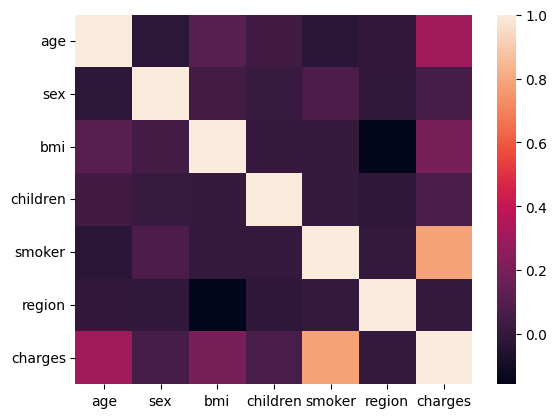

In [ ]:
# Korelasyon matrisini hesapla
sns.heatmap(insurance_data.corr())

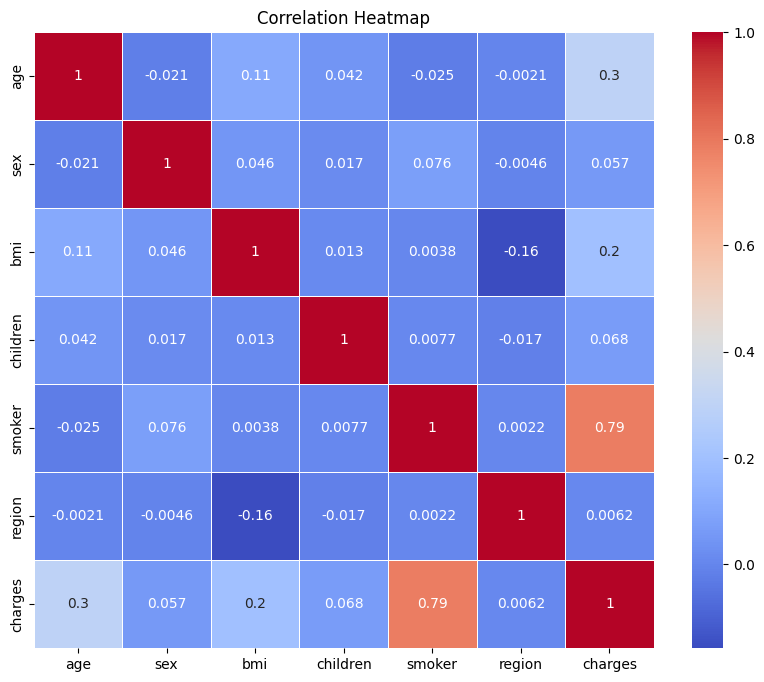

In [ ]:
correlation_matrix = insurance_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
threshold = 0.2

correlation_matrix = insurance_data.corr()

correlation_with_target = correlation_matrix['charges']
sorted_correlation = correlation_with_target.abs().sort_values(ascending=True)


selected_X = insurance_data.drop('charges', axis=1)


In [ ]:

new_train_X, new_test_X, new_train_Y, new_test_Y = train_test_split(selected_X, Y, test_size=0.2, random_state=42)

new_scaler = StandardScaler()
new_train_X_scaled = new_scaler.fit_transform(new_train_X)
new_test_X_scaled = new_scaler.transform(new_test_X)

# Yeni modeli eğitelim
new_linear_regression = LinearRegression().fit(new_train_X_scaled, new_train_Y)
new_prediction = new_linear_regression.predict(new_test_X_scaled)
new_r2_score = r2_score(new_test_Y, new_prediction)

print("New Linear Regression R^2 Score:", new_r2_score)


New Linear Regression R^2 Score: 0.7833463107364536


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(new_test_Y, new_prediction)
mae = mean_absolute_error(new_test_Y, new_prediction)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 33635210.43117845
Mean Absolute Error: 4186.508898366436
